In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [31]:
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


#### Data Exploration and Visualization

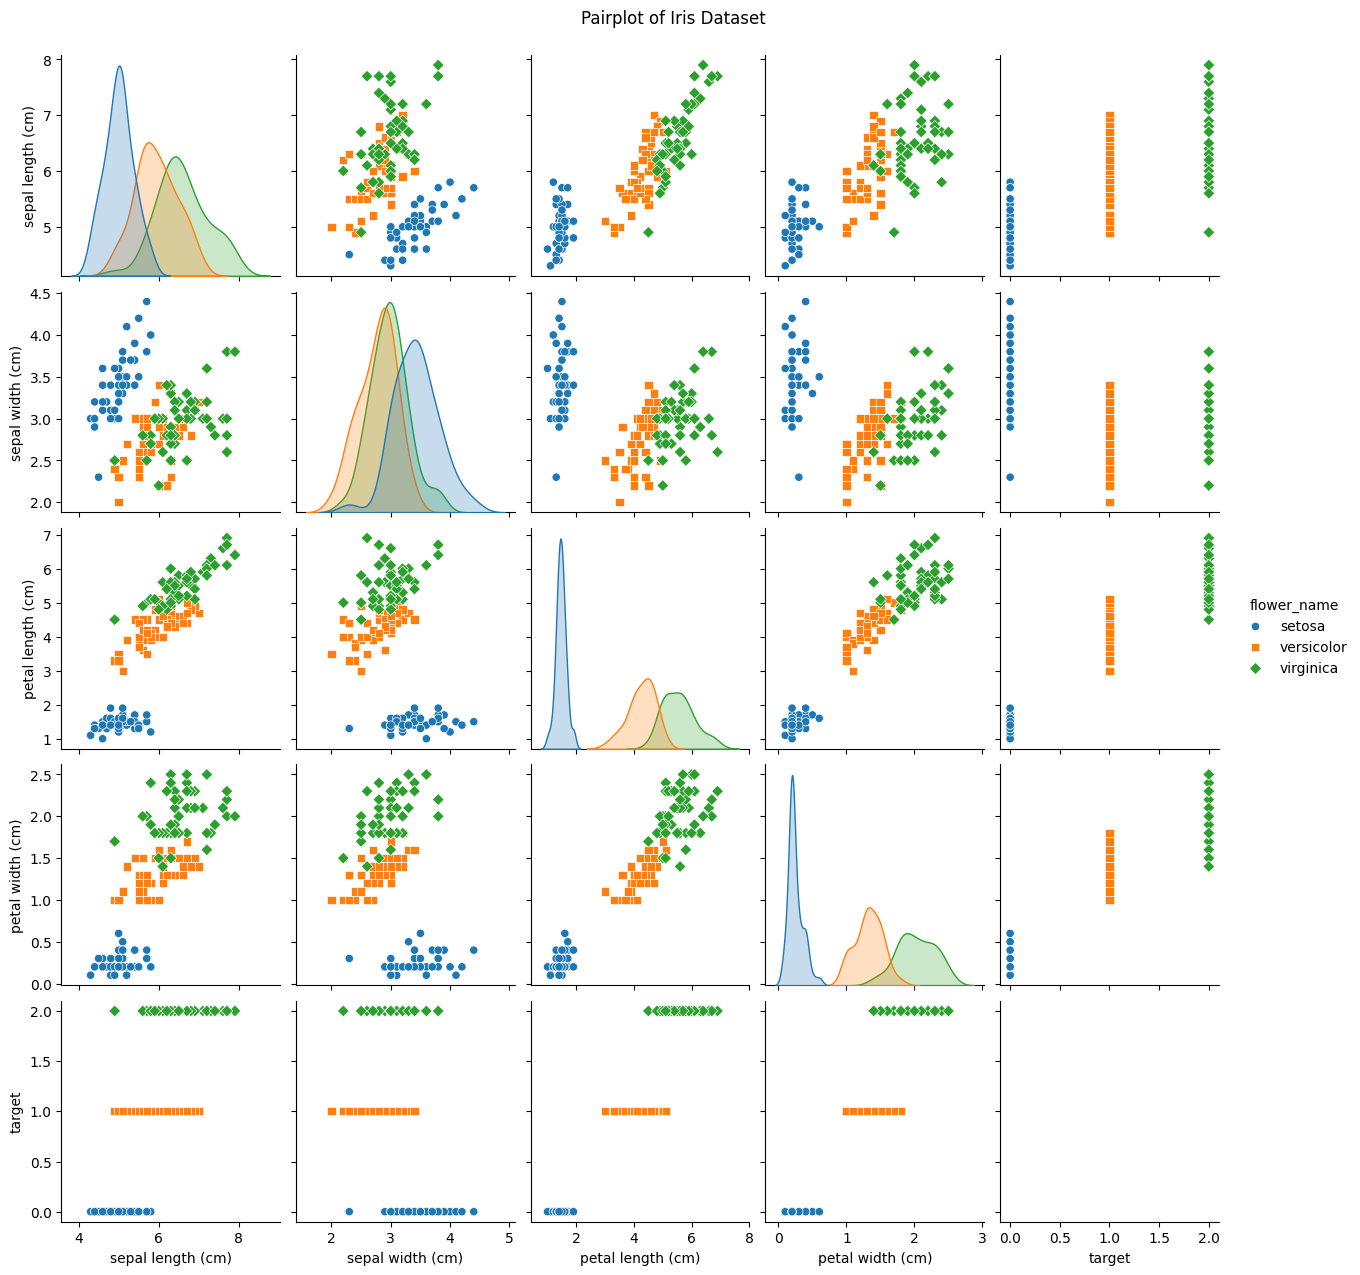

In [32]:
# Visualize the relationships between all features and the target variable
sns.pairplot(df, hue='flower_name', markers=["o", "s", "D"])
plt.suptitle('Pairplot of Iris Dataset', y=1.02)
plt.show()

In [33]:
df_setosa = df[df.target == 0]
df_versicolor = df[df.target == 1]
df_virginica = df[df.target == 2]

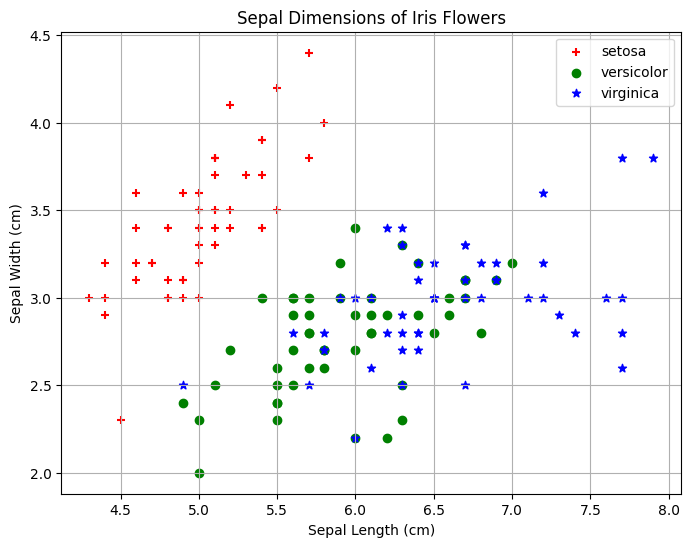

In [34]:
# Plot Sepal Length vs. Sepal Width
plt.figure(figsize=(8, 6))
plt.scatter(df_setosa['sepal length (cm)'], df_setosa['sepal width (cm)'], color='red', marker='+', label='setosa')
plt.scatter(df_versicolor['sepal length (cm)'], df_versicolor['sepal width (cm)'], color='green', marker='o', label='versicolor')
plt.scatter(df_virginica['sepal length (cm)'], df_virginica['sepal width (cm)'], color='blue', marker='*', label='virginica')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Dimensions of Iris Flowers')
plt.legend()
plt.grid(True)
plt.show()

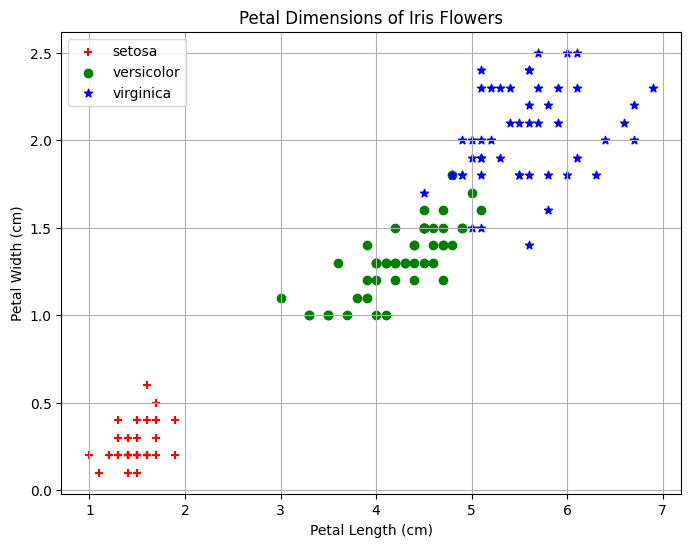

In [35]:
# Plot Petal Length vs. Petal Width
plt.figure(figsize=(8, 6))
plt.scatter(df_setosa['petal length (cm)'], df_setosa['petal width (cm)'], color='red', marker='+', label='setosa')
plt.scatter(df_versicolor['petal length (cm)'], df_versicolor['petal width (cm)'], color='green', marker='o', label='versicolor')
plt.scatter(df_virginica['petal length (cm)'], df_virginica['petal width (cm)'], color='blue', marker='*', label='virginica')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Dimensions of Iris Flowers')
plt.legend()
plt.grid(True)
plt.show()

#### Model Training

In [39]:
## Prepare Data
X = df.drop(['target', 'flower_name'], axis='columns')
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [40]:
## Train the SVM Model
model = SVC(kernel='rbf', C=1.0, gamma='auto') # Using a common kernel
model.fit(X_train, y_train)

SVC(gamma='auto')

#### Model Evaluation

In [41]:
# Model Accuracy
score = model.score(X_test, y_test)
print(f"\nModel Accuracy: {score:.2f}")


Model Accuracy: 1.00


In [42]:
# classification report
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



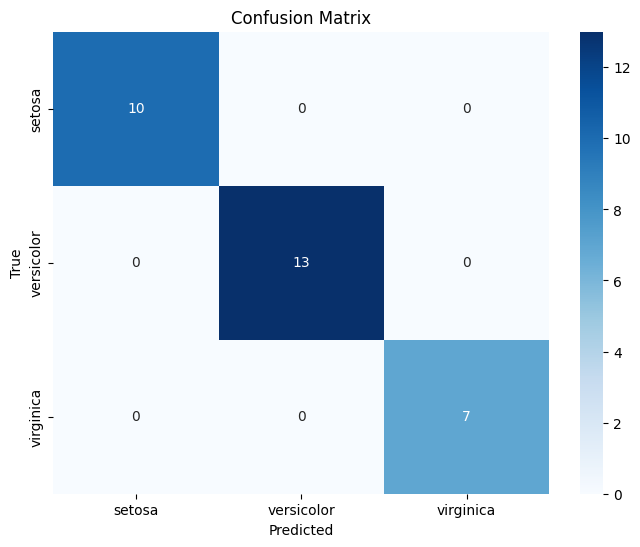

In [43]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()